In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

def window_converter(image, window_width, window_level):
        
    img_min = window_level - window_width // 2

    img_max = window_level + window_width // 2

    window_image = image.copy()

    window_image[window_image < img_min] = img_min

    window_image[window_image > img_max] = img_max
    #image = (image / image.max() * 255).astype(np.float64)
    return window_image
   


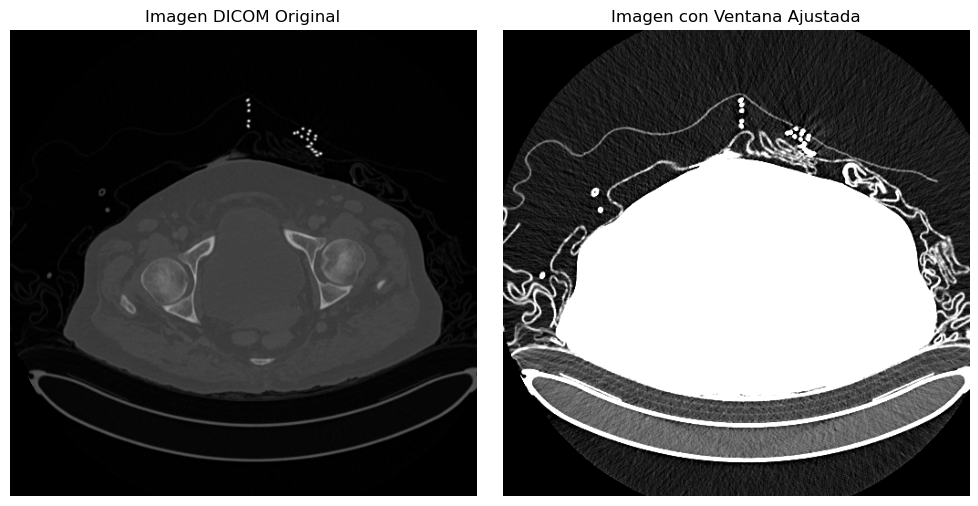

In [2]:
dicom_file_path = "/kaggle/input/rsna-2023-abdominal-trauma-detection/train_images/10004/21057/1053.dcm"
dicom_file = pydicom.dcmread(dicom_file_path)
dicom_image = dicom_file.pixel_array

window_width = 400
window_level = 50

windowed_image = window_converter(dicom_image, window_width, window_level)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dicom_image, cmap="gray")
plt.title("Imagen DICOM Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(windowed_image, cmap="gray")
plt.title("Imagen con Ventana Ajustada")
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
dicom_file

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.123.12345.1.2.3.10004.1.1053
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.3.123456.4.5.1234.1.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.123.12345.1.2.3.10004.1.1053
(0008, 0023) Content Date                        DA: '20230721'
(0008, 0033) Content Time                        TM: '232540.743627'
(0010, 0020) Patient ID                          LO: '10004'
(0018, 0050) Slice Thickness                     DS: '1.0'
(0018, 0060) KVP                                 DS: '90.0'
(0018, 5100) Patient Position                    CS: 'HFS'
(002

In [4]:
dicom_image.shape

(512, 512)

In [5]:
dicom_image.min()

0

In [6]:
dicom_image.max()

3982

In [7]:
def transform_to_hu(medical_image, image):

    intercept = medical_image.RescaleIntercept

    slope = medical_image.RescaleSlope

    hu_image = image * slope + intercept

    return hu_image

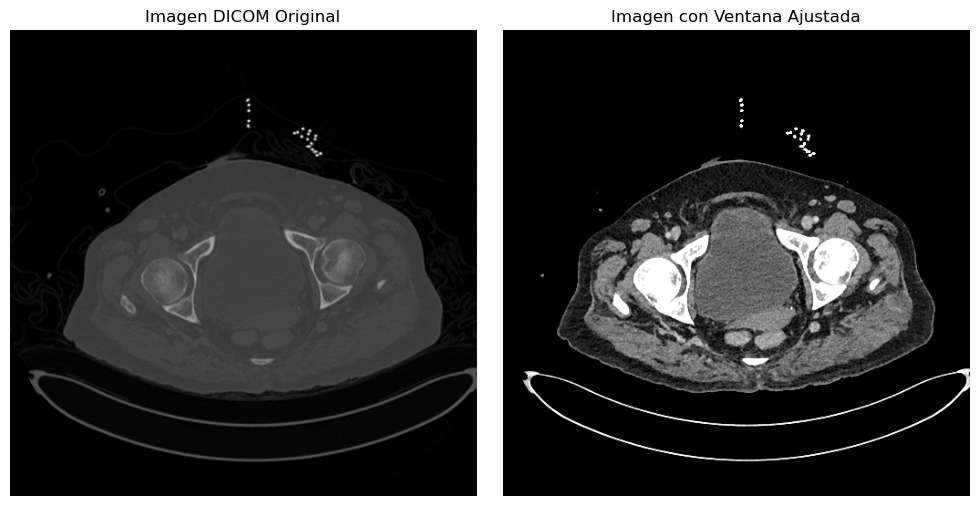

In [8]:

hu_image = transform_to_hu(dicom_file, dicom_image) #image converted to Hounsfield units (HU)
windowed_image = window_converter(hu_image, 400, 50)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(dicom_image, cmap="gray")
plt.title("Imagen DICOM Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(windowed_image, cmap="gray")
plt.title("Imagen con Ventana Ajustada")
plt.axis('off')

plt.tight_layout()
plt.show()


In [9]:
windowed_image.shape

(512, 512)

In [10]:
windowed_image.min()

-150.0

In [11]:
windowed_image.max()

250.0